# Clustering



This dataset presents health insurance costs, with each row representing an individual and their associated attributes. Let's break down the columns:

*   **age:** The age of the individual (numeric).
*   **is_male:** A boolean indicating whether the individual is male (TRUE) or female (FALSE).
*   **bmi:** Body Mass Index, a measure of body fat based on height and weight (numeric).
*   **bloodpressure:** Systolic blood pressure (numeric).
*   **diabetic:** A boolean indicating whether the individual is diabetic (TRUE) or not (FALSE).
*   **children:** The number of children the individual has (numeric).
*   **smoker:** A boolean indicating whether the individual is a smoker (TRUE) or not (FALSE).
*   **claim:** The amount of the insurance claim or medical expenses (numeric). This is likely the target variable you'd want to predict.
*   **northwest, southwest, northeast:** These are likely regions. They are represented as boolean values. If all three are false, the individual is presumably in the remaining region (southeast). This is one-hot encoding for region

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/demographics.csv')
df.head()

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim
0,39,True,23.2,91,True,0,False,1121.87
1,24,True,30.1,87,False,0,False,1131.51
2,19,True,41.1,100,False,0,False,1146.80
3,20,True,43.0,86,False,0,False,1149.40
4,30,True,53.1,97,False,0,False,1163.46


The scatter plot of age versus claim amount shows no clear linear relationship, with data points widely scattered. Claims appear concentrated among individuals aged 20-40, with fewer claims for older drivers. Several high-value claim outliers are present, suggesting unusual incidents."""



<Axes: xlabel='age', ylabel='claim'>

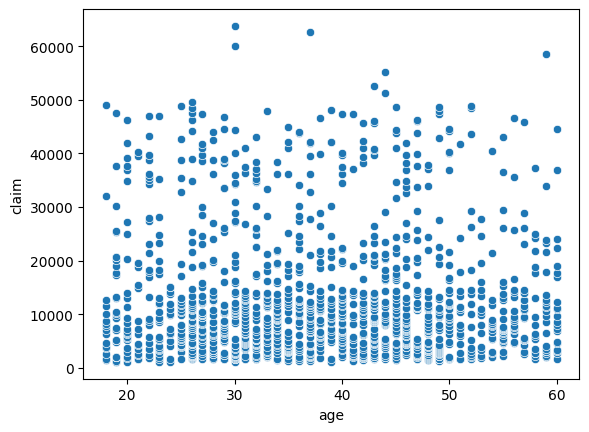

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['age'],y=df['claim'])

The scatter plot of BMI versus claim amount shows a weak positive trend, indicating a slight tendency for higher claim amounts with increasing BMI, but with substantial scatter. This suggests BMI is not a strong predictor of claim size, and other factors likely have a greater influence. Further analysis considering other variables is recommended"""


<Axes: xlabel='bmi', ylabel='claim'>

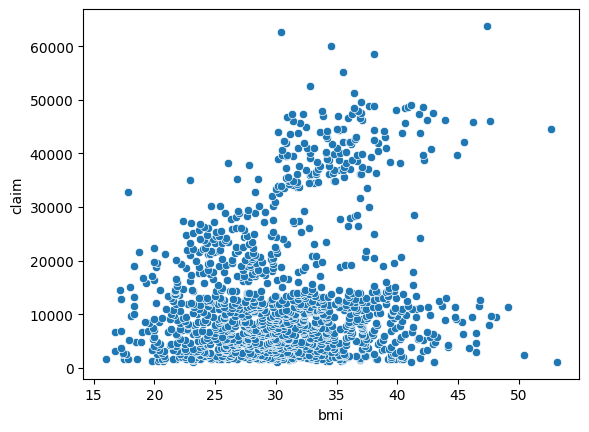

In [ ]:
sns.scatterplot(x=df['bmi'],y=df['claim'])

The scatter plot of blood pressure versus claim amount reveals a few key observations. Below a blood pressure of roughly 100, claims are generally lower and more densely clustered. Above 100, there's a wider spread of claim amounts, including some significantly higher claims."""


<Axes: xlabel='bloodpressure', ylabel='claim'>

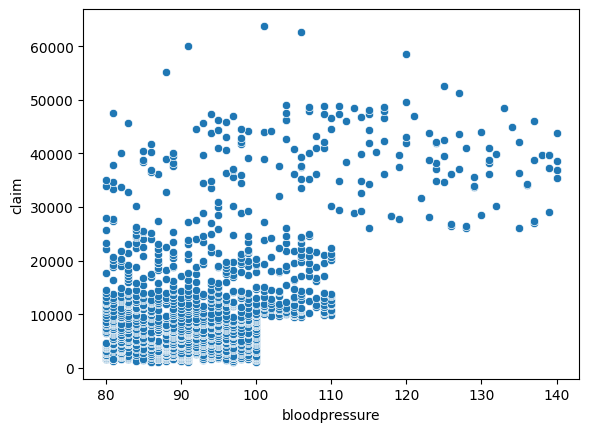

In [ ]:
sns.scatterplot(x=df['bloodpressure'],y=df['claim'])

K-means clustering is a method used to group similar data points into a specified number of clusters, denoted by 'K'. The algorithm begins by randomly selecting K data points as initial cluster centers. Each remaining data point is then assigned to the nearest center based on a distance metric, typically Euclidean distance. After this assignment, the algorithm recalculates the position of each cluster center by averaging the data points assigned to it. This process of assigning points to the nearest center and then recalculating the centers is repeated iteratively until the cluster centers stabilize, meaning they no longer shift significantly between iterations. The result is a partitioning of the data into K distinct groups of similar data points.

![](https://miro.medium.com/v2/resize:fit:960/format:webp/1*h2WdqGZD6WsNcUdwZDqsFA.gif)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['cluster'] = kmeans.labels_
df

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim,cluster
0,39,True,23.2,91,True,0,False,1121.87,2
1,24,True,30.1,87,False,0,False,1131.51,2
2,19,True,41.1,100,False,0,False,1146.80,2
3,20,True,43.0,86,False,0,False,1149.40,2
4,30,True,53.1,97,False,0,False,1163.46,2
...,...,...,...,...,...,...,...,...,...
1327,44,False,35.5,88,True,0,True,55135.40,1
1328,59,False,38.1,120,False,1,True,58571.07,1
1329,30,True,34.5,91,True,3,True,60021.40,1
1330,37,True,30.4,106,False,0,True,62592.87,1


This scatter plot displays the results of K-means clustering on 'age' and 'claim' data, with colors representing the three identified clusters. Cluster 0 is clearly distinguished by consistently low claim amounts and a tendency towards younger ages. Clusters 1 and 2, however, exhibit more overlap, particularly in age, although Cluster 2 tends to encompass higher claim amounts overall. This suggests K-means has segmented the data based primarily on claim size, with a secondary influence of age, separating lower-claim younger individuals from two overlapping groups with higher and more varied claim amounts. Further investigation into other features is needed to fully characterize these clusters."""


<Axes: xlabel='age', ylabel='claim'>

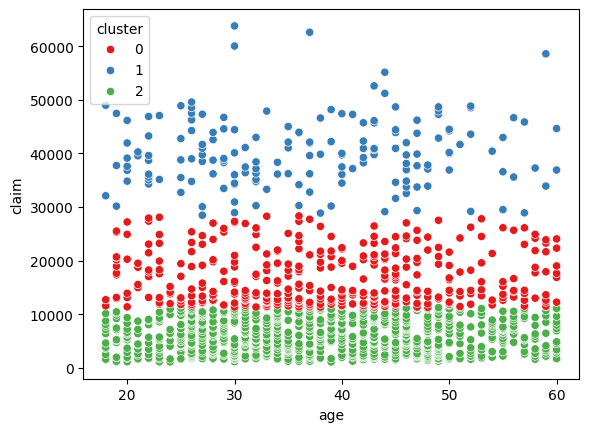

In [ ]:
sns.scatterplot(x=df['age'],y=df['claim'],hue=df['cluster'],palette='Set1')

This scatter plot, showing K-means clustering results on BMI and claim amount, reveals three distinct clusters. Cluster 0 represents individuals with lower BMI and consistently low claims. Cluster 1 has moderate BMI and a mid-range of claims. Cluster 2 is characterized by higher BMI and a wider, often higher, range of claim amounts, suggesting a link between higher BMI and increased healthcare costs."""


<Axes: xlabel='bmi', ylabel='claim'>

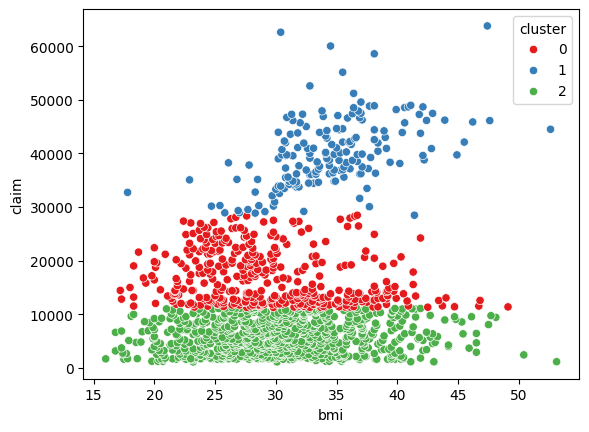

In [ ]:
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['cluster'],palette='Set1')

This scatter plot shows the results of K-means clustering on blood pressure and claim amount. Cluster 0 is concentrated at lower claim amounts and blood pressures generally below 100. Cluster 1 occupies a middle ground for both blood pressure and claim amounts, with blood pressure mostly between 80 and 120. Cluster 2 is primarily associated with higher claim amounts and spans a broader range of blood pressures, although it's more prevalent at higher blood pressure levels. This suggests that K-means has primarily clustered based on claim amount, with blood pressure playing a secondary role in distinguishing the groups, particularly in separating the low-claim group (Cluster 0) from the others


<Axes: xlabel='bloodpressure', ylabel='claim'>

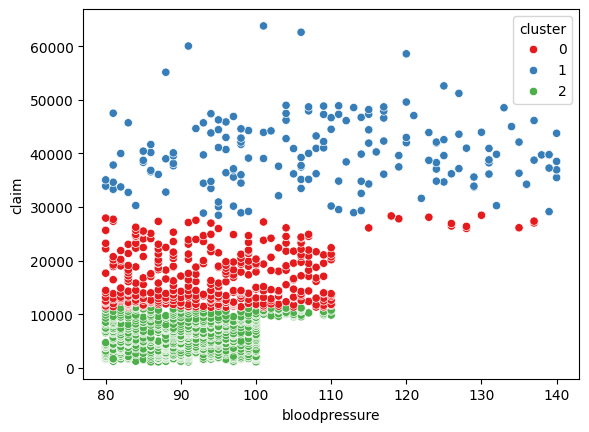

In [ ]:
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['cluster'],palette='Set1')

Let's break this one between male...

<Axes: xlabel='bloodpressure', ylabel='claim'>

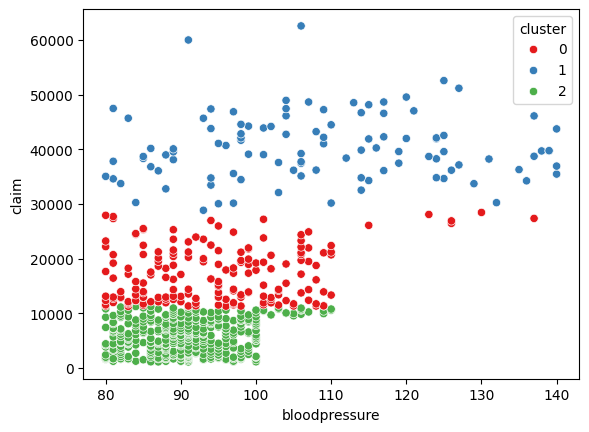

In [ ]:

df_male = df[df['is_male']==True]
df_female = df[df['is_male']==False]
sns.scatterplot(x=df_male['bloodpressure'],y=df_male['claim'],hue=df_male['cluster'],palette='Set1')


... and female

<Axes: xlabel='bloodpressure', ylabel='claim'>

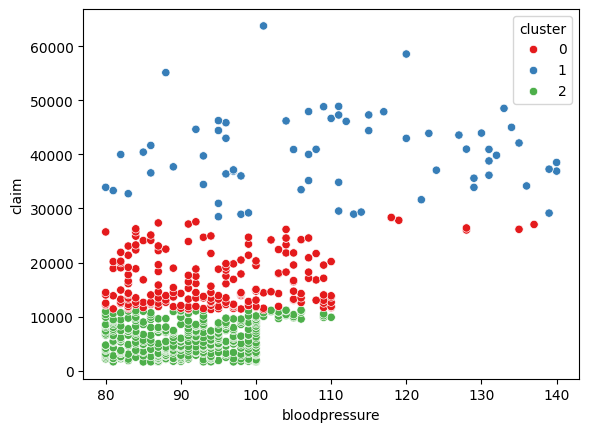

In [ ]:

sns.scatterplot(x=df_female['bloodpressure'],y=df_female['claim'],hue=df_female['cluster'],palette='Set1')


Should we try again with a different k?

We plot the "inertia" (which measures how tightly grouped the clusters are) against the number of clusters. As you increase the number of clusters, the inertia will always decrease. However, at some point, adding more clusters doesn't significantly reduce the inertia anymore. This point, where the plot starts to flatten out like an elbow, is often considered the optimal number of clusters because it offers a good balance between having a few, distinct clusters and not over-segmenting your data


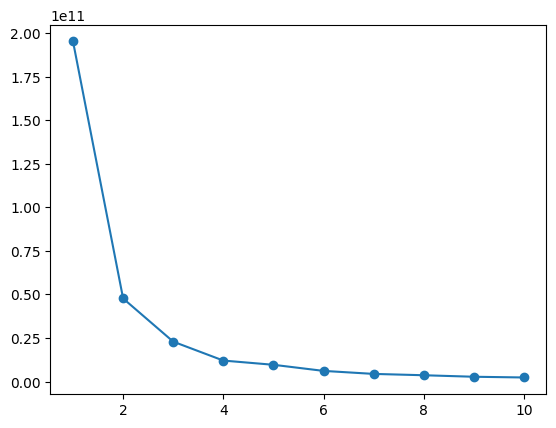

In [ ]:

import matplotlib.pyplot as plt
inertias = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker='o')